In [ ]:
## Kevin Estrada Sec A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [2]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset into a pandas DataFrame
data_path = 'titanic.csv'  
titanic_data = pd.read_csv(data_path)


print(titanic_data.head())



    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [3]:

# Total number of passengers
total_passengers = len(titanic_data)

# Percentage of male passengers
percentage_male = (titanic_data['Sex'].sum() / total_passengers) * 100

# Percentage of passengers who survived
percentage_survived = (titanic_data['Survived'].sum() / total_passengers) * 100

# Print the results
print(f"Total passengers: {total_passengers}")
print(f"Percentage male: {percentage_male:.2f}%")
print(f"Percentage survived: {percentage_survived:.2f}%")


Total passengers: 891
Percentage male: 64.76%
Percentage survived: 38.38%


Your written answer:

Total passengers: 891
Percentage male: 64.76%
Percentage survived: 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [4]:
# Calculate total female and male passengers
total_females = len(titanic_data[titanic_data['Sex'] == 0])
total_males = len(titanic_data[titanic_data['Sex'] == 1])

# Calculate female and male survivors
female_survivors = len(titanic_data[(titanic_data['Sex'] == 0) & (titanic_data['Survived'] == 1)])
male_survivors = len(titanic_data[(titanic_data['Sex'] == 1) & (titanic_data['Survived'] == 1)])

# Calculate percentages
percentage_female_survived = (female_survivors / total_females) * 100
percentage_male_survived = (male_survivors / total_males) * 100

# Print the results
print(f"Percentage of female passengers who survived: {percentage_female_survived:.2f}%")
print(f"Percentage of male passengers who survived: {percentage_male_survived:.2f}%")


Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:
Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [5]:
# Total number of passengers for reference
total_passengers = len(titanic_data)

# Group by 'Pclass' and calculate the required metrics
ticket_stats = titanic_data.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),
    survived_tickets=('Survived', 'sum')
)

# Calculate percentage of total tickets and survivorship percentage
ticket_stats['percentage_total_tickets'] = (ticket_stats['total_tickets'] / total_passengers) * 100
ticket_stats['survivorship_percentage'] = (ticket_stats['survived_tickets'] / ticket_stats['total_tickets']) * 100

# Display the result
print(ticket_stats)


        total_tickets  survived_tickets  percentage_total_tickets  \
Pclass                                                              
1                 216               136                 24.242424   
2                 184                87                 20.650954   
3                 491               119                 55.106622   

        survivorship_percentage  
Pclass                           
1                     62.962963  
2                     47.282609  
3                     24.236253  


Your written answer:

 - Class 1 
    - % 24.24:
    - % 62.96: 
- Class 2 
    - % 20.65:
    - % 47.28: 
- Class 3
    - % 55.10:
    - % 24.23: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors DataFrame:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors DataFrame:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


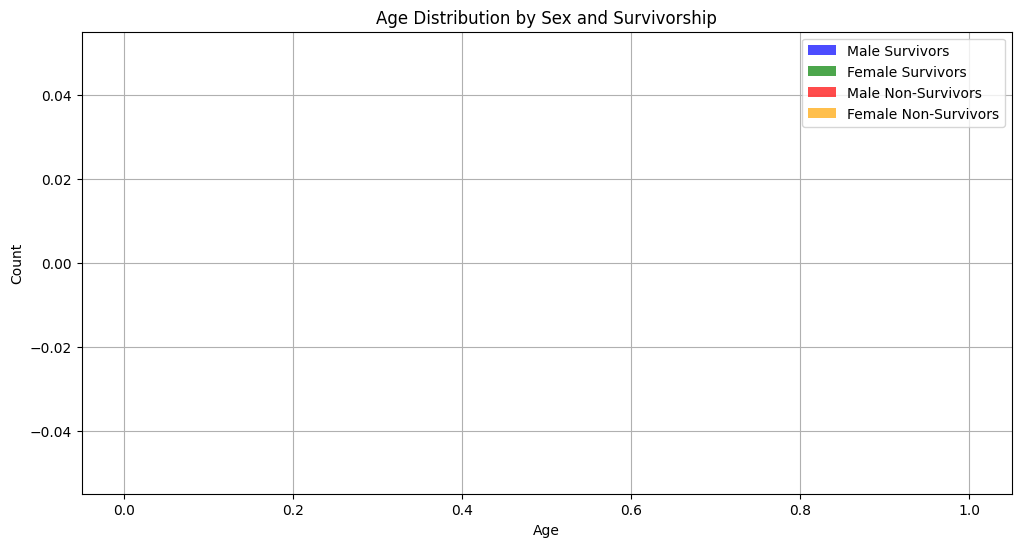

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'titanic.csv' 
titanic_data = pd.read_csv(data_path)

survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']].dropna()
non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']].dropna()

print("Survivors DataFrame:")
print(survivors.head())
print("\nNon-Survivors DataFrame:")
print(non_survivors.head())

plt.figure(figsize=(12, 6))

male_survivors = survivors[survivors['Sex'] == 'male']['Age']
female_survivors = survivors[survivors['Sex'] == 'female']['Age']
male_unlucky = non_survivors[non_survivors['Sex'] == 'male']['Age']
female_unlucky = non_survivors[non_survivors['Sex'] == 'female']['Age']

# Plot histograms
plt.hist(male_survivors, bins=15, alpha=0.7, label='Male Survivors', histtype='stepfilled', color='blue')
plt.hist(female_survivors, bins=15, alpha=0.7, label='Female Survivors', histtype='stepfilled', color='green')
plt.hist(male_unlucky, bins=15, alpha=0.7, label='Male Non-Survivors', histtype='stepfilled', color='red')
plt.hist(female_unlucky, bins=15, alpha=0.7, label='Female Non-Survivors', histtype='stepfilled', color='orange')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.grid(True)

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

data_path = 'titanic.csv'
titanic_data = pd.read_csv(data_path)

titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
features = titanic_data[['Pclass', 'Age', 'Fare', 'Sex']]
features['Age'] = features['Age'].fillna(features['Age'].median())
features['Fare'] = features['Fare'].fillna(features['Fare'].median())
labels = titanic_data.loc[features.index, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1.0, random_state=42)

knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

knn_train_preds = knn.predict(X_train_scaled)
knn_test_preds = knn.predict(X_test_scaled)
svm_train_preds = svm.predict(X_train_scaled)
svm_test_preds = svm.predict(X_test_scaled)

print("KNN Confusion Matrix (Training):")
print(confusion_matrix(y_train, knn_train_preds))
print("\nKNN Confusion Matrix (Testing):")
print(confusion_matrix(y_test, knn_test_preds))

print("\nSVM Confusion Matrix (Training):")
print(confusion_matrix(y_train, svm_train_preds))
print("\nSVM Confusion Matrix (Testing):")
print(confusion_matrix(y_test, svm_test_preds))

print("\nKNN Classification Report (Testing):")
print(classification_report(y_test, knn_test_preds))

print("\nSVM Classification Report (Testing):")
print(classification_report(y_test, svm_test_preds))


C:\Users\Kevin\AppData\Local\Temp\ipykernel_12724\493256090.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'] = features['Age'].fillna(features['Age'].median())
C:\Users\Kevin\AppData\Local\Temp\ipykernel_12724\493256090.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Fare'] = features['Fare'].fillna(features['Fare'].median())
c:\Users\Kevin\miniconda3\envs\cs371\lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_m

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - Had a couple errors with ths one 


Which models did you fit and which worked better?
 
 - 